# Analysing historical discharge data for Loire basin at Blois station

This notebook is used to analyse historical discharge data to analyse periods of drought. An algorithm is used which calculates the amount of droughts and severity of the drought.

### 1. Importing general python modules

In [41]:
# general python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from datetime import datetime, timedelta

# niceties
from rich import print

### 2. Loading data

In [51]:
# load data for Blois catchment
basin_name = "FR003882"
q_data = pd.read_csv("FR003882_streamflow_m3s.csv", index_col='date', parse_dates=True)["FR003882"]
q_data_9019 = q_data['1997-01-01':'2019-12-31']

### 3. Plot discharge January vs. August

In [52]:
# get the monthly mean values
Q_mean_month = q_data.groupby(pd.PeriodIndex(q_data.index, freq="M")).mean()

# get the values for January and August
Q_jan = pd.Series(Q_mean_month[Q_mean_month.index.month == 1], name='January')
Q_aug = pd.Series(Q_mean_month[Q_mean_month.index.month == 8], name='August')

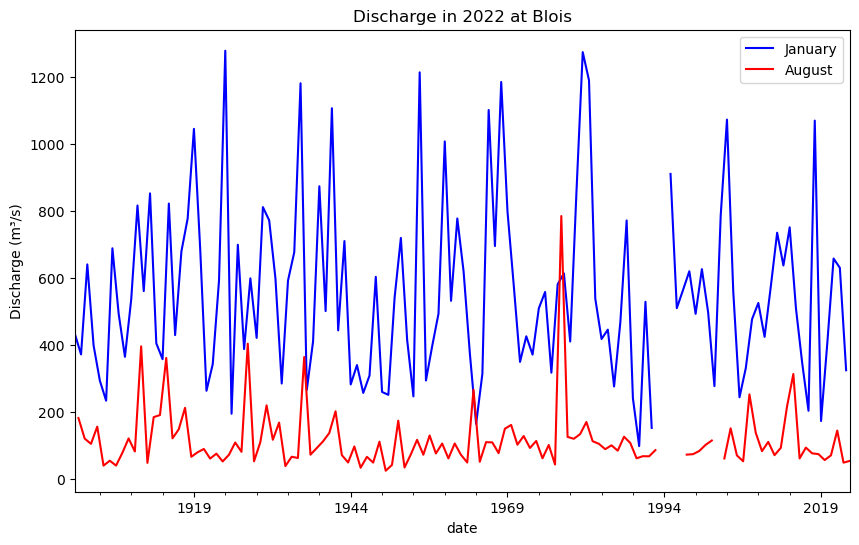

In [53]:
# plot the results
plt.figure(figsize=(10, 6))
Q_jan.plot(label="January", color='blue')
Q_aug.plot(label="August", color='red')
plt.title('Discharge in 2022 at Blois')
plt.ylabel('Discharge (m³/s)')

# zoom in on single drought
#q_data_2022.plot(label="Discharge")
#plt.xlim(['2022-07-20', '2022-11-01'])
#plt.ylim([20, 100])
#plt.axhline(y = 50, color = 'black', linestyle = '-')

# plot
plt.legend()
plt.show()

### 4. Create a function which detects droughts
Go to Drought_analyser.ipynb to see the code. This function is placed in a separate file so it is easy to use in other files, without copying the whole code.

In [54]:
%run Drought_analyser.ipynb

### 5. Plot the data and fit a line

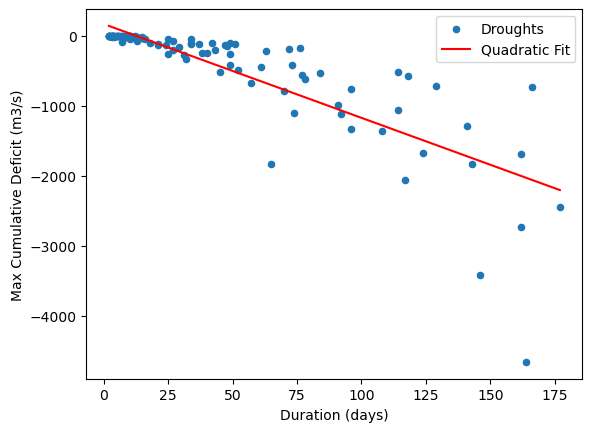

In [55]:
drought_df = drought_analyser(q_data, basin_name, 66.5)
ax = drought_df.plot(x="Duration (days)", y="Max Cumulative Deficit (m3/s)", kind="scatter", label="Droughts")

# get first drought point
#first_point = drought_df.iloc[0]  # Get the first row of the dataframe
#plt.scatter(66, -130, color='red', label='Drought 2022')

# Extract x and y values
x = drought_df["Duration (days)"]
y = drought_df["Max Cumulative Deficit (m3/s)"]

# Fit a quadratic function (parabola)
coeffs = np.polyfit(x, y, 1)  # 2nd-degree polynomial (quadratic)
poly_func = np.poly1d(coeffs)  # Convert to polynomial function

# Generate smooth x values for the curve
x_smooth = np.linspace(x.min(), x.max(), 100)
y_smooth = poly_func(x_smooth)

# Plot the fitted curve
plt.plot(x_smooth, y_smooth, color="red", label="Quadratic Fit")

# Show legend
plt.legend()
plt.show()

### 6. Extra plots for presentation

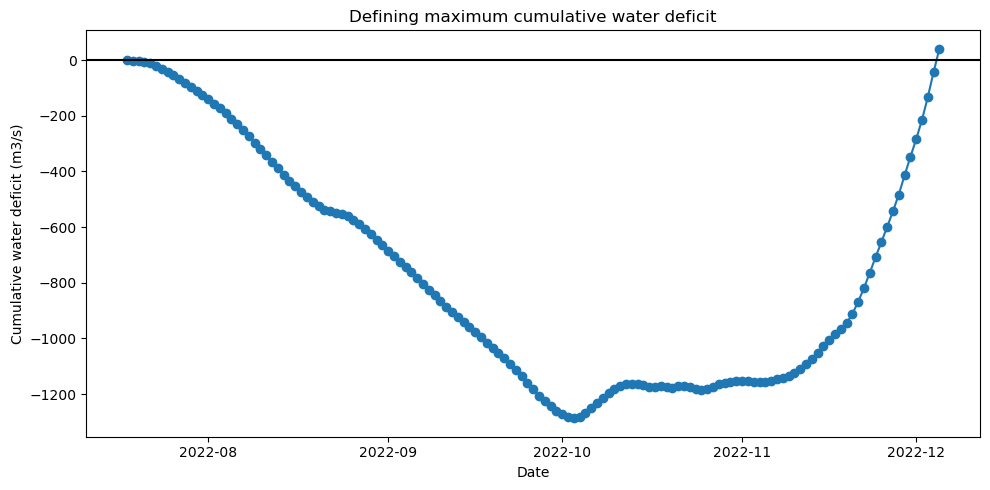

In [56]:
# find the drought
cum_def = drought_df['Cum Deficit List'].iloc[102]
start_date = drought_df['Start Date'].iloc[102]
duration = drought_df['Duration (days)'].iloc[102]
date_list = [start_date + timedelta(days=i) for i in range(duration)]

# plot the graph
plt.figure(figsize=(10, 5))
plt.plot(date_list, cum_def, marker='o')
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.title("Defining maximum cumulative water deficit")
plt.xlabel("Date")
plt.ylabel("Cumulative water deficit (m3/s)")
#plt.xticks(rotation=45)  # Rotate dates for readability
plt.tight_layout()
plt.show()